In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

figdir = '/home/561/jn8053/g_e14/figures-tmp/easterlies-collaborative/'

# Entire column

In [2]:
steric_ssh_control = -xr.open_dataset('slev_steric_onshelf_control.nc')['__xarray_dataarray_variable__']
steric_ssh_up = -xr.open_dataset('slev_steric_onshelf_up.nc')['__xarray_dataarray_variable__']
steric_ssh_down = -xr.open_dataset('slev_steric_onshelf_down.nc')['__xarray_dataarray_variable__']

In [14]:
steric_ssh_dzt_up = -xr.open_dataset('slev_steric_onshelf_dzt_up.nc')['__xarray_dataarray_variable__']
steric_ssh_dzt_down = -xr.open_dataset('slev_steric_onshelf_dzt_down.nc')['__xarray_dataarray_variable__']

In [3]:
mass_control = xr.open_dataset('pbot_onshelf_control.nc')['__xarray_dataarray_variable__']
mass_up = xr.open_dataset('pbot_onshelf_up.nc')['__xarray_dataarray_variable__']
mass_down = xr.open_dataset('pbot_onshelf_down.nc')['__xarray_dataarray_variable__']

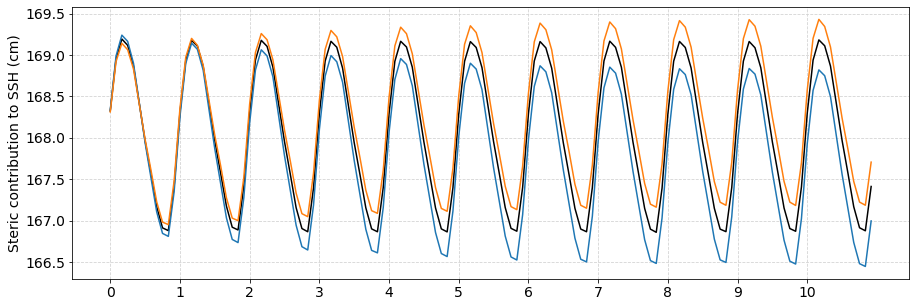

In [6]:
plt.rcParams['font.size'] = 14
plt.figure(figsize = (15, 5))
plt.plot(np.arange(0, 132, 1), steric_ssh_control*100, 'k')
plt.plot(np.arange(0, 132, 1), steric_ssh_up*100, 'C0')
plt.plot(np.arange(0, 132, 1), steric_ssh_down*100, 'C1')
plt.ylabel('Steric contribution to SSH (cm)')
plt.grid(linestyle = '--', color = 'lightgrey')
plt.xticks(np.arange(0, 132, 12), np.arange(0,11,1));
plt.savefig(figdir+'steric_total_changes_updownctrl.jpg', bbox_inches = 'tight')

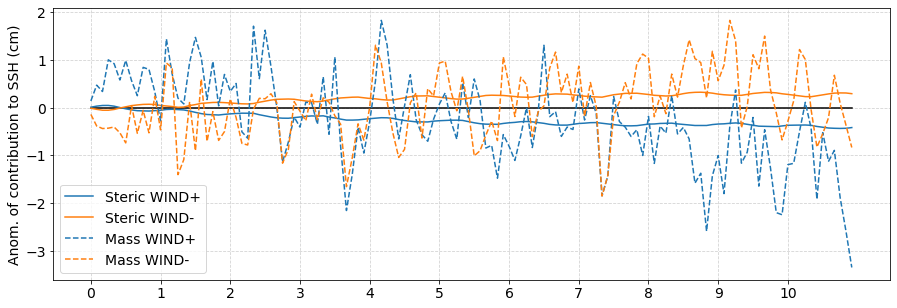

In [4]:
plt.rcParams['font.size'] = 14
plt.figure(figsize = (15, 5))
plt.plot(np.arange(0, 132, 1), steric_ssh_control*0, 'k')
plt.plot(np.arange(0, 132, 1), (steric_ssh_up-steric_ssh_control)*100, 'C0', label = 'Steric WIND+')
plt.plot(np.arange(0, 132, 1), (steric_ssh_down-steric_ssh_control)*100, 'C1', label = 'Steric WIND-')
plt.plot(np.arange(0, 132, 1), (mass_up-mass_control)*100, 'C0', linestyle = '--', label = 'Mass WIND+')
plt.plot(np.arange(0, 132, 1), (mass_down-mass_control)*100, 'C1', linestyle = '--', label = 'Mass WIND-')
plt.ylabel('Anom. of contribution to SSH (cm)')
plt.legend()
plt.grid(linestyle = '--', color = 'lightgrey')
plt.xticks(np.arange(0, 132, 12), np.arange(0,11,1));
plt.savefig(figdir+'steric_total_changes_updownanom_with_mass.jpg', bbox_inches = 'tight')

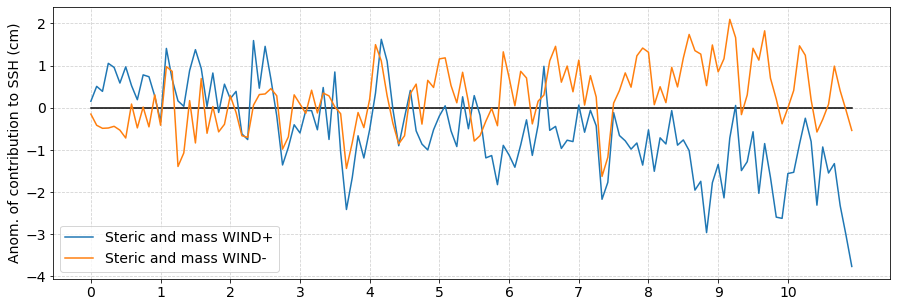

In [5]:
plt.rcParams['font.size'] = 14
plt.figure(figsize = (15, 5))
plt.plot(np.arange(0, 132, 1), steric_ssh_control*0, 'k')
plt.plot(np.arange(0, 132, 1), (mass_up-mass_control)*100+(steric_ssh_up-steric_ssh_control)*100, 'C0', label = 'Steric and mass WIND+')
plt.plot(np.arange(0, 132, 1), (mass_down-mass_control)*100+(steric_ssh_down-steric_ssh_control)*100, 'C1', label = 'Steric and mass WIND-')
plt.ylabel('Anom. of contribution to SSH (cm)')
plt.legend()
plt.grid(linestyle = '--', color = 'lightgrey')
plt.xticks(np.arange(0, 132, 12), np.arange(0,11,1));
plt.savefig(figdir+'steric_total_changes_updownanom_with_mass_total.jpg', bbox_inches = 'tight')

## Plot with Figure 2

In [6]:
import cosima_cookbook as cc

In [7]:
session_ryf = cc.database.create_session()
experiment_ryf = '01deg_jra55v13_ryf9091'
experiment_eup = '01deg_jra55v13_ryf9091_easterlies_up10'
experiment_edo = '01deg_jra55v13_ryf9091_easterlies_down10'

ti = '2150-01-01'
tf = '2159-12-31'

In [8]:
ht = cc.querying.getvar(experiment_ryf, 'ht', session_ryf, n = 1).sel(yt_ocean = slice(None, -58))

In [9]:
slev = {}
slev['ctrl'] = cc.querying.getvar(experiment_ryf, 'sea_level', session_ryf, start_time = '2149-07-01', end_time = tf).sel(time = slice('2149-07-01', tf), yt_ocean = slice(None, -58))
slev['up'] = cc.querying.getvar(experiment_eup, 'sea_level', session_ryf, start_time = ti, end_time = tf).sel(yt_ocean = slice(None, -58))
slev['down'] = cc.querying.getvar(experiment_edo, 'sea_level', session_ryf, start_time = ti, end_time = tf).sel(yt_ocean = slice(None, -58))

Append 6 months of control to up and down

In [10]:
lat_slice = slice(-80,-58)
lon_slice = slice(-280, 80)

def shelf_mask_isobath(var):
    '''
    Masks ACCESS-OM2-01 variables by the region polewards of the 1000m isobath as computed using 
    a script contributed by Adele Morrison.
    Only to be used with ACCESS-OM2-0.1 output!
    '''
    contour_file = np.load('/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz')
    shelf_mask = contour_file['contour_masked_above']
    yt_ocean = contour_file['yt_ocean']
    xt_ocean = contour_file['xt_ocean']
    # Mask values that are non-zero
    shelf_mask[np.where(shelf_mask!=0)] = np.nan
    shelf_mask = shelf_mask+1
    shelf_map = np.nan_to_num(shelf_mask)
    shelf_mask = xr.DataArray(shelf_mask, coords = [('yt_ocean', yt_ocean), ('xt_ocean', xt_ocean)])
    shelf_map = xr.DataArray(shelf_map, coords = [('yt_ocean', yt_ocean), ('xt_ocean', xt_ocean)])
    # Multiply the variable with the mask, we need to account for the shape of the mask. 
    # The mask uses a northern cutoff of 59S.
    masked_var = var.sel(yt_ocean = lat_slice) * shelf_mask
    return masked_var, shelf_map

In [11]:
slev_mask = {}
for k in ['ctrl', 'up', 'down']:
    slev_mask[k], shelf_mask = shelf_mask_isobath(slev[k])

In [12]:
# Area for weighting
area_t = cc.querying.getvar(experiment_ryf, 'area_t', session_ryf, ncfile = 'ocean_grid.nc', n = -1)
area_t = area_t.sel(yt_ocean = lat_slice).sel(xt_ocean = lon_slice)
area_t = area_t * shelf_mask.sel(yt_ocean = lat_slice).sel(xt_ocean = lon_slice)
area_sum = area_t.sum('xt_ocean').sum('yt_ocean')

In [13]:
slev_clim_control = ((slev_mask['ctrl']*area_t).sum('xt_ocean').sum('yt_ocean') / area_sum)
slev_clim_up = ((slev_mask['up']*area_t).sum('xt_ocean').sum('yt_ocean') / area_sum)
slev_clim_down = ((slev_mask['down']*area_t).sum('xt_ocean').sum('yt_ocean') / area_sum)

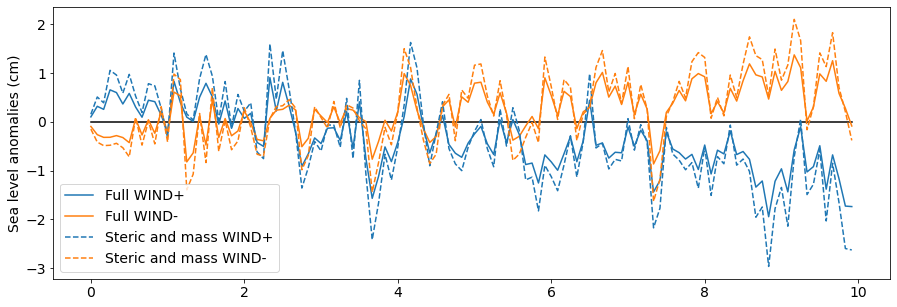

In [14]:
plt.rcParams['font.size'] = 14
fig = plt.figure(figsize = (15, 5))
axs = fig.add_subplot()

axs.plot(np.arange(0, 120, 1), 0*slev_clim_up, 'k')
axs.plot(np.arange(0, 120, 1), 100*(slev_clim_up-slev_clim_control), label = 'Full WIND+')
axs.plot(np.arange(0, 120, 1), 100*(slev_clim_down-slev_clim_control), label = 'Full WIND-')
axs.plot(np.arange(0, 120, 1), (mass_up[:-12]-mass_control[:-12])*100+(steric_ssh_up[:-12]-steric_ssh_control[:-12])*100, 
         linestyle = '--', color = 'C0', label = 'Steric and mass WIND+')
axs.plot(np.arange(0, 120, 1), (mass_down[:-12]-mass_control[:-12])*100+(steric_ssh_down[:-12]-steric_ssh_control[:-12])*100,
         linestyle = '--', color = 'C1', label = 'Steric and mass WIND-')

axs.set_xticks(np.arange(0, 144, 24))
axs.set_xticklabels(np.arange(0, 12, 2))
axs.set_ylabel('Sea level anomalies (cm)')
plt.legend()

plt.savefig(figdir+'raw_ssh_anom_steric_mass_changes.jpg', bbox_inches = 'tight')